I downloaded the text data from WikiSource (books written before 1923 are in the public domain) and am using Berkeley's basic datascience tools to generate tables and graphs.

# Analyzing characters

I'm creating a table of the number of times a main character is mentioned in each chapter for Part 1 of the book (total of 35 chapters).

In [15]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import collections

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

anna_karenina_url = 'https://jesca.github.io/data/Anna_Karenina_Part_One.txt'
#anna_karenina_url = 'https://jesca.github.io/data/Anna_Karenina.txt'
ak_txt = read_url(anna_karenina_url)
ak_chapters = ak_txt.split('Chapter')[34:]

# Display the chapters of Anna Karenina in a table.
Table().with_column('Chapters', ak_chapters)


Chapters
34
1 Happy families are all alike; every unhappy family is ...
2 Stepan Arkadyevitch was a truthful man in his relatio ...
"3 When he was dressed, Stepan Arkadyevitch sprinkled so ..."
"4 Darya Alexandrovna, in a dressing jacket, and with he ..."
"5 Stepan Arkadyevitch had learned easily at school, tha ..."
6 When Oblonsky asked Levin what had brought him to tow ...
"7 On arriving in Moscow by a morning train, Levin had p ..."
"8 When the professor had gone, Sergey Ivanovitch turned ..."
"9 At four o'clock, conscious of his throbbing heart, Le ..."


In [53]:
count_vrosnky = Table().with_columns([
        'Vronsky (lover)', np.char.count(ak_chapters, 'Vronsky'),
        'Karenin (husband)', np.char.count(ak_chapters, 'Alexey'),
        'Anna (protagonist)', np.char.count(ak_chapters, 'Anna'),
        'Konstantin (co-protagonist)', np.char.count(ak_chapters, 'Levin'),
        'Kitty', np.char.count(ak_chapters, 'Kitty'),
    ])

cum_counts = count_vrosnky.cumsum().with_column('Chapter', np.arange(1, 36,1))


We then plot the cumulative times that this name appears as we read. 

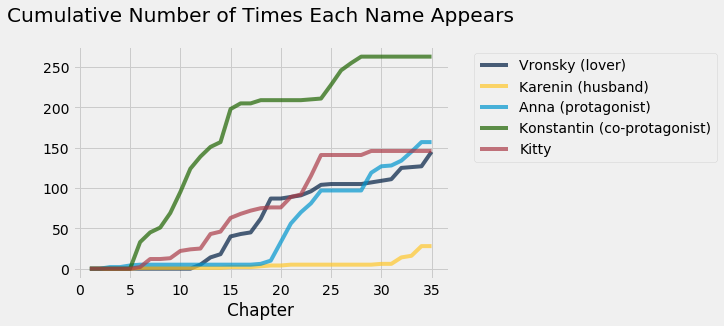

In [30]:
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);


Kitty and Levin are the parallel couple, whose moralistic and prosperous relationship contrasts the ill-fated one Anna and Vronskey. Interestingly, their names are mentioned more than Vronskey and Anna! In fact, Konstanin, the co-protagonist, shows up 60% more than Vronskey does. Their relationship is just as important, if not more so, to Tolstoy's novel.

I was curious about this and discovered that a reason for this may be that Tolstoy identified with Levin's character (Levin even has Tolstoy's own first name - Lev in Russian!) and details of his committed courtship of Kitty were even taken from Tolstoy's life. 

We see that Karenin, her husband is barely mentioned at all until around Chapter 30, where Karenin starts getting suspicious and Anna is so tense she can barely sleep at night and contemplates if she should tell her husband about her relationship with Vronsky. 

# Frequently used words 

Another way we can look at this novel a bit more is to observe the content. I wrote a simple script below to identify the top 15 most-used words, excluding stopwords. (There are powerful libraries to do text analysis that will essentially do the same thing for us, but I figured we don't need to use them for this exercise.)

In [44]:
import collections

# stopwords object from stopwords.txt from https://github.com/Alir3z4/stop-words 
stopwords = set(line.strip() for line in open('stopwords.txt'))

#remove names specific to this book + other potential stop words
stopwords = stopwords.union(set(['chapter','dolly','countess','levin', 'stepan', 'vronsky', 'anna', 'kitty', 'alexey', 'now','arkadyevitch','know','well','like']))

#instantiate a dictionary for every word in the file -- don't need libraries with heavy text processing for this task
wordcount={}

# eliminate duplicates, split by punctuation, and use case demiliters.
for word in ak_txt.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("*","")
    
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
top50 = collections.Counter(wordcount).most_common(15)
top50_keys = [item[0] for item in top50]
top50_values = [item[1] for item in top50]

countWordsTable = Table().with_columns("Words", top50_keys, "Count", top50_values)
print(countWordsTable)

Words  | Count
come   | 103
face   | 102
eyes   | 98
go     | 97
went   | 95
see    | 86
love   | 84
felt   | 83
though | 83
yes    | 83
... (5 rows omitted)


Here's a bar chart sorted by count:

Text(0.5, 1.0, 'Top 15 frequently used words')

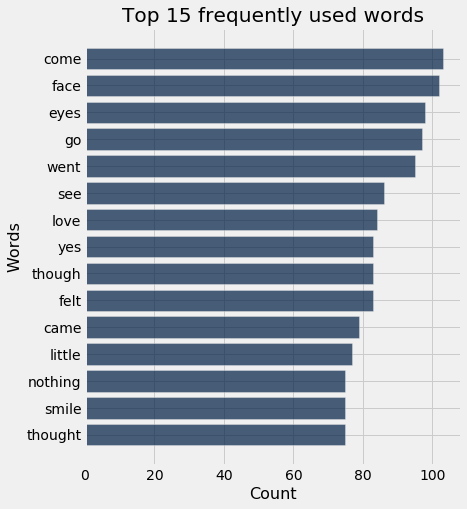

In [52]:
countWordsTable.sort('Count',descending=True).barh("Words", "Count")
plots.title('Top 15 frequently used words')

And of course, why not have generate a word cloud from this? 

Tolstoy describes his characters' expressions with a lot of focus on the eyes and face. 


* "Who's Vronsky?" said Levin, and his <b>face</b> was suddenly transformed from the look of childlike ecstasy which Oblonsky had just been admiring to an angry and unpleasant expression.

* Kitty got up to fetch a table, and as she passed, her <b>eyes</b> met Levin's. She felt for him with her whole heart, the more because she was pitying him for suffering of which she was herself the cause. "If you can forgive me, forgive me," said her <b>eyes</b>, "I am so happy."

 

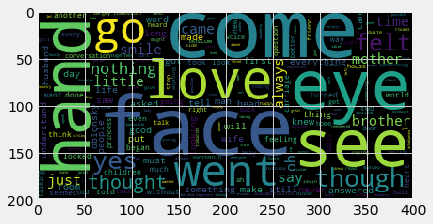

In [45]:
#wordcloud
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=stopwords).generate(ak_txt.lower())

plt.imshow(wordcloud)
